In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

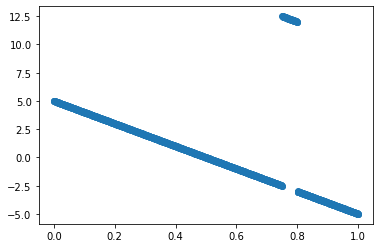

In [ ]:
x, y = generate_data()
plt.scatter(x, y)

What's odd is that the line segment between x = 0.75 and x = 0.8 is moved upward by 15.

# 2. Implement linear regression (2 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

In [ ]:
# Initialize the parameters m and b
n = y.shape[0] # n is the number of training example
np.random.seed(12)
b = np.random.randn()
m = np.random.randn()
# Initialize loss list for the convenience of plotting loss curve
losses = []

In [ ]:
# Gradient Descent
# first set the learning rate 
learning_rate = 0.1 
for iter in range(1000):
  # calculate the estimate of y
  y_estimate = m * x + b
  
  # calculate the error using squared-error loss function
  loss = np.sum((y_estimate - y) ** 2) / (2*n)
  losses.append(loss)

  # take the derivative w.r.t m and b
  dm = 1/n * np.sum((y_estimate - y) * x)
  db = 1/n * np.sum(y_estimate - y)

  # update w and b
  m = m - learning_rate * dm
  b = b - learning_rate * db


In [ ]:
print(losses[998])
print(losses[999])

5.088519248203654
5.088519197276511


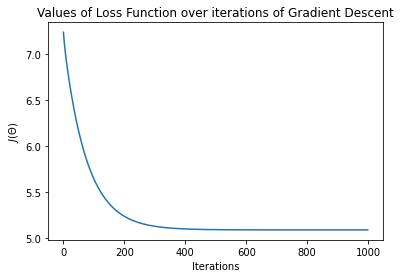

In [ ]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Loss Function over iterations of Gradient Descent");

The losses keep decreasing over each iteration, which means the learning rate 
0.1 is appropriate. 

The difference of loss between 999th and 1000th iteration is less than $\mathrm{10}^{-3}$. Thus, we can declare convergence.  

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


In [ ]:
print("The value of estimated w is: " + "\n" + str(m))
print("The value of estimated b is: " + "\n" + str(b))
y_pred = m*x+b

The value of estimated w is: 
-7.518030824377429
The value of estimated b is: 
4.508682516078752


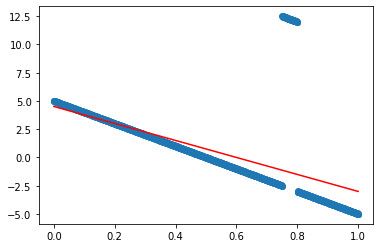

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, c="red")

The ground truth value for w is -10 and the truth value for the biase term is 5.

The values estimated by my model are -7.518030824377429 for w and 
4.508682516078752 for b, which are not close to their ground truth value.

It is because this linear regression model is strongly influenced by the outliers between x=0.75 and x=0.8. 

# 4. "Robust" linear regression (0.5 points)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

In [ ]:
# Initialize the parameters m and b
n = y.shape[0] # n is the number of training example
np.random.seed(12)
b2 = np.random.randn()
m2 = np.random.randn()
# Initialize loss list for the convenience of plotting loss curve
losses2 = []

In [ ]:
# Gradient Descent using L1 loss

# first set the learning rate 
learning_rate = 0.01
for iter in range(5500):
  # calculate the estimate of y
  y_estimate = m2 * x + b2
  
  # calculate the error using squared-error loss function
  loss = np.sum(np.abs(y_estimate - y)) / n
  losses2.append(loss)

  # take the derivative w.r.t m and b
  dm2 = 1/n * np.sum((y_estimate - y) / np.abs(y_estimate - y) * x)
  db2 = 1/n * np.sum((y_estimate - y) / np.abs(y_estimate - y))

  # update w and b
  m2 = m2 - learning_rate * dm2
  b2 = b2 - learning_rate * db2

In [ ]:
losses2[5499]

0.7564308691067005

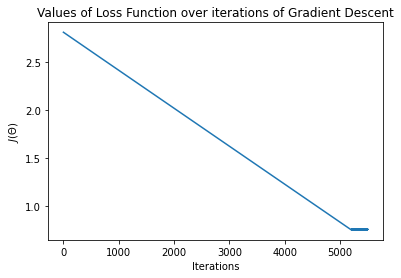

In [ ]:
plt.plot(losses2)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Loss Function over iterations of Gradient Descent");

After a steady decrease, the loss trajectory becomes a horizontal line, which indicates convergence. 

The loss trajectory for linear regression with L1 loss is a straight line, while that for squared-error linear regression is a convex curve. 

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

In [ ]:
print("The value of estimated w is: " + "\n" + str(m2))
print("The value of estimated b is: " + "\n" + str(b2))
y_pred2 = m*x+b

The value of estimated w is: 
-10.001669242803908
The value of estimated b is: 
4.996945831490282


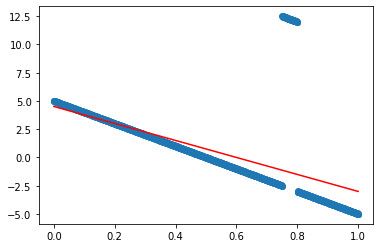

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred2, c="red")

Now, with L1 loss function, the estimated value of w is -10.001669242803908, and the estimated value of b is 4.996945831490282. They are much closer to the ground true values compared to the squared-error linear regression. The behavior is different due to the use of a different loss function. The L1 (absolute difference) loss function is more robust to outliers than the L2 (squared error) loss function. 

## Acknowledgement
I collaberate with Yicheng Zou to work on this assignment. 

Part of the code in this assignment is adapted from Andrew Ng's Machine Learning course on Coursera. 